# Header Block

In [7]:
# This header will be the same no matter what code you are using
# import modules that we will use multiple functions from and give them short names. 

import pandas as pd;
import numpy as np;
import seaborn as sb;
import matplotlib.pyplot as plt;


# import single functions

from scipy.stats.contingency import chi2_contingency;
from itertools import combinations;
from statsmodels.graphics.mosaicplot import mosaic;
from scipy.stats.contingency import chi2_contingency;
from scipy.stats import pearsonr;

# Data Management Block

This particular situation has a crap-ton of data management, just copy this whole block and run it as a unit. Nothing should need to be altered.  

In [8]:
# Import Variables

addhealth_url = 'https://drive.google.com/uc?export=download&id=1LOoZl4utpqTfKjj6nu70RH16frFLyPfm'
myData = pd.read_csv(addhealth_url, usecols=['H4ID8','H4ID11','H4MH20','H4GH7'],low_memory=False)


# Rename Variables

myData.rename(columns={
    'H4ID8':'car_accident',
    'H4ID11':'pain_relief',
    'H4GH7':'weight_perceived',
    'H4MH20':'just_as_good_orig'
},inplace=True)

# Deal with non-responses and legitimate skips

myData['car_accident'].replace({
    6:np.nan,
},inplace=True)

myData['pain_relief'].replace({
    6:np.nan,
    8:np.nan,
},inplace=True)

myData['just_as_good_orig'].replace({
    6:np.nan,
},inplace=True)

myData['weight_perceived'].replace({
    6:np.nan,
},inplace=True)


# Collapse Variables

def collapse_var(row):
  if (row['just_as_good_orig'] in [0,1]):
    return 0
  elif (row['just_as_good_orig'] in [2,3]):
    return 1

myData['just_as_good'] = myData.apply(lambda row: collapse_var(row),axis=1)

# Add Text Labels

myData['car_accident'].replace({
    0.0:'No',
    1.0:'Yes',
},inplace=True)


myData['pain_relief'].replace({
    0.0:'No',
    1.0:'Yes',
},inplace=True)

myData['just_as_good'].replace({
    0.0:'No',
    1.0:'Yes',
},inplace=True)

myData['weight_perceived'].replace({
    1.0:"Very Underweight",
    2.0:"Slightly Underweight",
    3.0:"About the Right Weight",
    4.0:"Slightly Overweight",
    5.0:"Very Overweight",
},inplace=True)

#Everything Else

To create a two-way table, you use the pd.crosstab function. 
 

In [9]:
pd.crosstab(myData['car_accident'], myData['pain_relief'],margins=True)

pain_relief,No,Yes,All
car_accident,,,
No,3910,663,4573
Yes,449,89,538
All,4359,752,5111


We can take the row-proportions, by using the normalize="index" argument. 

In [10]:
pd.crosstab(myData['car_accident'], myData['pain_relief'],margins=True, normalize="index")

pain_relief,No,Yes
car_accident,,
No,0.855019,0.144981
Yes,0.834572,0.165428
All,0.852866,0.147134


We can also find the column proportions with the normalize='columns' argument. 

In [11]:
pd.crosstab(myData['car_accident'], myData['pain_relief'],margins=True, normalize="columns")

pain_relief,No,Yes,All
car_accident,,,
No,0.896995,0.881649,0.894737
Yes,0.103005,0.118351,0.105263


One way to visualize a two-way table is to use a 'mosaic' plot. Which you can see below for the 'car_accident' and 'pain_relief' variables. 

Text(0.5, 1.0, 'Have you been in a car accident? versus Have you taken pain medication?')

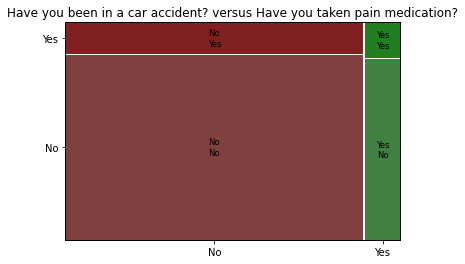

In [12]:
mosaic(data=myData, index=['car_accident','pain_relief'],axes_label=True)
plt.title("Have you been in a car accident? versus Have you taken pain medication?")